
# Zadanie 2 

In [35]:
import tensorflow
import keras
from keras.datasets import cifar10
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

In [23]:
# Wczytanie danych fashion mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# co jest w x_train
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [24]:
# zawartość y_train
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

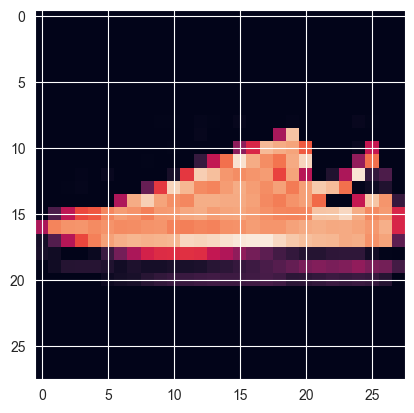

In [25]:
# Przykładowe zdjęcie z naszego zbioru treningowego
plt.imshow(x_train[6])

In [26]:
# Normalizacja danych
x_train = x_train / 255.0
x_test = x_test / 255.0

# Budowa Modelu

In [27]:
# Definicja modelu 
model = Sequential([
 Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 Flatten(),
 Dense(48, activation='relu'),
 Dense(10, activation='softmax')
])


# Kompilacja modelu
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

# Trenowanie modelu

In [28]:
# Trenowanie modelu
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/15
1875/1875 [==============================] - 31s 15ms/step - loss: 0.5207 - accuracy: 0.8093 - val_loss: 0.3855 - val_accuracy: 0.8639
Epoch 2/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3336 - accuracy: 0.8789 - val_loss: 0.3255 - val_accuracy: 0.8840
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2847 - accuracy: 0.8960 - val_loss: 0.3042 - val_accuracy: 0.8925
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2516 - accuracy: 0.9075 - val_loss: 0.2959 - val_accuracy: 0.8948
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2291 - accuracy: 0.9150 - val_loss: 0.2923 - val_accuracy: 0.8912
Epoch 6/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2113 - accuracy: 0.9220 - val_loss: 0.2643 - val_accuracy: 0.9052
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1941 - accuracy: 0.9284 - val_loss: 0.2679 -

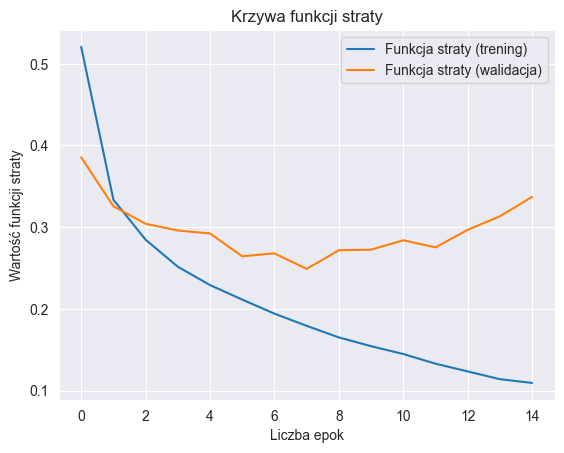

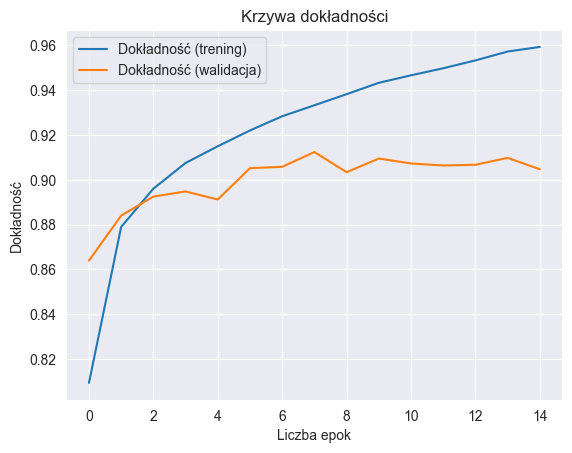

In [29]:
# Wizualizacja krzywych uczenia
plt.plot(history.history['loss'], label='Funkcja straty (trening)')
plt.plot(history.history['val_loss'], label='Funkcja straty (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Wartość funkcji straty')
plt.legend()
plt.title('Krzywa funkcji straty')
plt.show()
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Krzywa dokładności')
plt.show()

# Tworzenie predykcji

In [30]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [31]:
y_pred

array([[1.23746000e-08, 4.86373572e-12, 7.51470997e-10, ...,
        2.88842853e-06, 5.94261316e-08, 9.99997020e-01],
       [1.38474552e-05, 6.20887403e-19, 9.99985099e-01, ...,
        6.31520502e-16, 1.20998446e-11, 4.40190105e-16],
       [2.45961660e-15, 1.00000000e+00, 3.70318502e-14, ...,
        1.48417723e-28, 1.72657288e-12, 2.36157566e-23],
       ...,
       [2.77691718e-19, 1.03889270e-21, 4.39946299e-17, ...,
        2.15726301e-24, 1.00000000e+00, 5.42814929e-28],
       [1.13153009e-20, 1.00000000e+00, 3.72072510e-16, ...,
        2.15307048e-31, 4.33161270e-20, 1.28727987e-26],
       [9.54194768e-09, 5.25870681e-14, 1.44205103e-07, ...,
        8.60591314e-08, 8.67880559e-08, 5.53464011e-11]], dtype=float32)

In [32]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

[881 977 877 886 865 989 685 950 982 955]


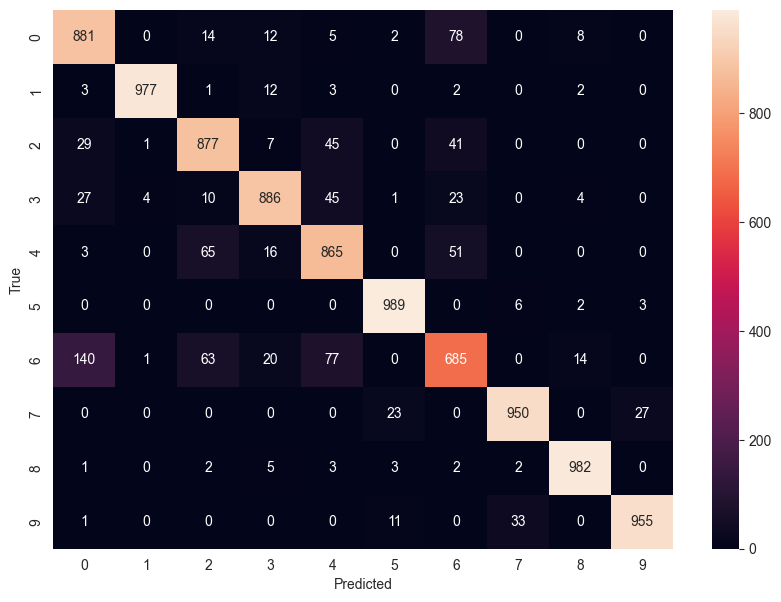

In [33]:
# Obliczenie confusion matrix

cm = confusion_matrix(y_test, y_pred)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(10)], columns = [i for i in range(10)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [34]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.88      0.85      1000\n           1       0.99      0.98      0.99      1000\n           2       0.85      0.88      0.86      1000\n           3       0.92      0.89      0.91      1000\n           4       0.83      0.86      0.85      1000\n           5       0.96      0.99      0.97      1000\n           6       0.78      0.69      0.73      1000\n           7       0.96      0.95      0.95      1000\n           8       0.97      0.98      0.98      1000\n           9       0.97      0.95      0.96      1000\n\n    accuracy                           0.90     10000\n   macro avg       0.90      0.90      0.90     10000\nweighted avg       0.90      0.90      0.90     10000\n'

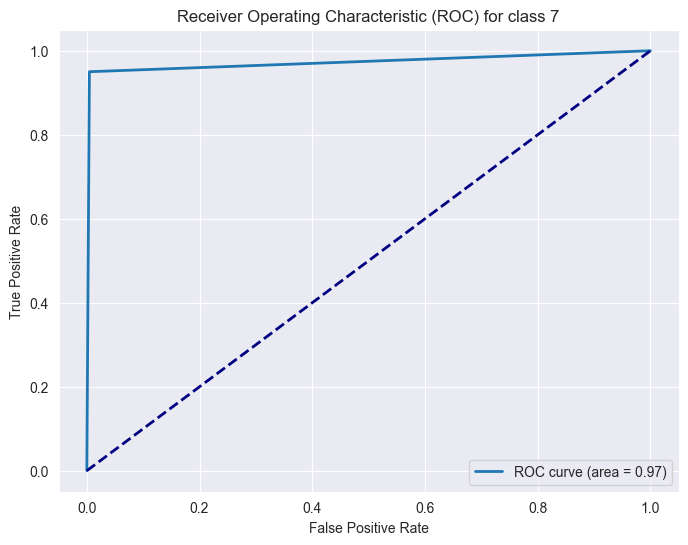

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Przygotowanie danych dla klasy 7
y_test_7 = (y_test == 7).astype(int)  
y_pred_7 = (y_pred == 7).astype(int) 

# Obliczenie krzywych ROC dla klasy 7
fpr, tpr, _ = roc_curve(y_test_7, y_pred_7)
roc_auc = auc(fpr, tpr)

# Wyświetlenie krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for class 7')
plt.legend(loc='lower right')
plt.show()

# Wnioski
Najczęściej mylona jest 6 czyli koszula z z 0 czyli t-shirtem, za to 7 czyli trampki jest mylona najczęściej z sandałami i butkami